## Observations and Insights 
1. For the capomulin treatment, as time increases (days past) the tumor volume decreases.
2. Average tumor volume increases as weight inceases.
3. This is a good study because the amount of mice over all the drug regimen are similar and the sex distribution is fairly equal.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(data_df["Mouse ID"].unique())
print(mice_count)


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data_df[data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = data_df.loc[data_df['Mouse ID'] == "g989",:]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_df.drop_duplicates(subset = ["Mouse ID","Timepoint"])


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(clean_data["Mouse ID"].unique())
print(new_mice_count)


249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_clean_data = clean_data.groupby(["Drug Regimen"])

mean_tumor_volume = round(grouped_clean_data["Tumor Volume (mm3)"].mean(),2)
median_tumor_volume = round(grouped_clean_data["Tumor Volume (mm3)"].median(),2)
variance_tumor_volume = round(grouped_clean_data["Tumor Volume (mm3)"].var(),2)
standard_deviation_tumor_volume = round(grouped_clean_data["Tumor Volume (mm3)"].std(),2)
sem_tumor_volume = round(grouped_clean_data["Tumor Volume (mm3)"].sem(),2)

summary_statistics = pd.DataFrame({ "Mean Tumor Volume":mean_tumor_volume, 
                                    "Median Tumor Volume": median_tumor_volume, 
                                    "Variance Tumor Volume": variance_tumor_volume, 
                                    "Standard Deviation Tumor Volume": standard_deviation_tumor_volume,
                                     "SEM Tumor Volume":sem_tumor_volume
})

summary_statistics.head()


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_2 = round(grouped_clean_data["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),2)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_2 = summary_statistics_2.rename(columns={"mean": "Mean Tumor Volume",
                                                  "median": "Median Tumor Volume",
                                                   "var": "Variance Tumor Volume",
                                                   "std":"Standard Dev Tumor Volume ", 
                                                   "sem":"SEM Tumor Volume"})

summary_statistics_2.head()


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Mice Count'>

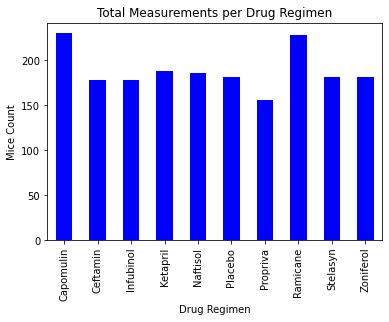

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_count = grouped_clean_data["Mouse ID"].count()
pandas_drug_plot = drug_regimen_count.plot.bar(title = "Total Measurements per Drug Regimen", color = "blue")
pandas_drug_plot.set_xlabel("Drug Regimen")
pandas_drug_plot.set_ylabel("Mice Count")
pandas_drug_plot


Text(0, 0.5, 'Total Mice')

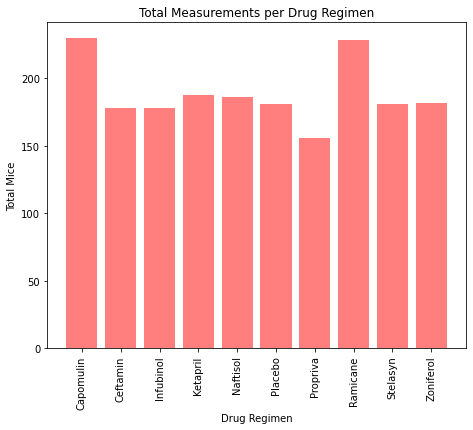

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Setting up axises
x_axis = np.arange(len(drug_regimen_count))
y_axis = drug_regimen_count

#Tick Locations
ticks = list(drug_regimen_count.index.values)
tick_locations = [value for value in x_axis]

#Plot figure
plt.figure(figsize=(7.5,6))
plt.bar(x_axis, y_axis, color ='red', alpha=0.5, align="center")
plt.xticks(tick_locations, ticks, rotation="90")

#Plot Annotations
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")


Text(0, 0.5, '')

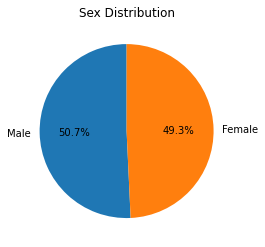

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Identify distribution of data by sex
pie_data = clean_data['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = pie_data.plot.pie(autopct="%1.1f%%", startangle=90, title='Sex Distribution')

# Hide the 'y' label
pie_plot.set_ylabel('')


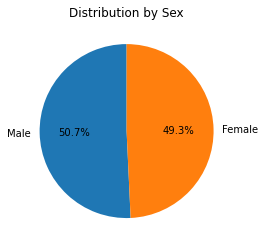

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = clean_data['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(pie_data, labels=pie_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Max Timepoint
max_timepoint=clean_data.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 

#Merging the dataframes
new_tumor_df = pd.merge(max_timepoint, clean_data, on=(["Mouse ID","Timepoint"]))
new_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


## Line and Scatter Plots

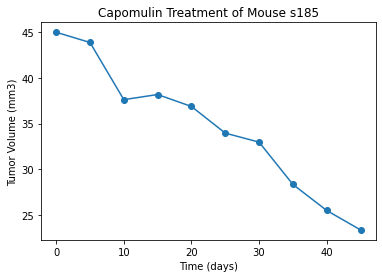

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = data_df.loc[data_df['Mouse ID'] == 's185']

#Plot and labeling
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

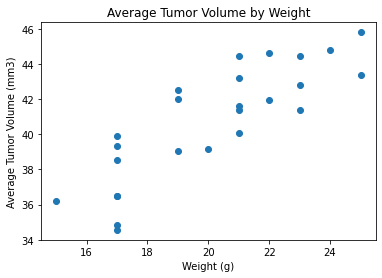

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']


avg_vol = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_vol = pd.merge(capomulin_df, avg_vol, on='Mouse ID')
final_avg_vol = avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol

x = final_avg_vol['Weight (g)']
y = final_avg_vol['avg_tumor_vol']

plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()

## Correlation and Regression

The correlation coefficient for the Capomulin regimen (mouse weight and average tumor volume) is 0.84.


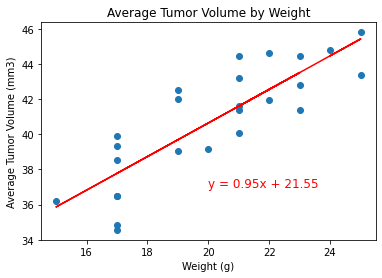

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation coefficient
correlation = st.pearsonr(x,y)
print(f"""The correlation coefficient for the Capomulin regimen (mouse weight and average tumor volume) is {round(correlation[0],2)}.""")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Linear Regression Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

#Plot Annotations
plt.annotate(line_eq,(20,37),fontsize=12,color="red")

#Plot Labeling
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()